importing libraries

In [375]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import scipy.integrate as integrate

To specify Times New Roman font and to force that withing plotting commands

In [376]:
tnr = "Times New Roman"
plt.rcParams['font.sans-serif'] = tnr
plt.rcParams['font.family'] = tnr
params ={'mathtext.default':'regular'}          
plt.rcParams.update(params)

setting user defined parameters

In [377]:
R_star = 1.e7 # km
V_inf = 2250. # km/s
beta = 1.0001
M_lossrate = 2*(10**(30))*1.e-6 # kg/s

maxratio = 8. # max ratio of r/R_star on the grid, so that the grid plotted are scaled by R_star
R_shock = 1.5*R_star
T_star = 2

setting up the grid

In [378]:
x = np.linspace(-maxratio, maxratio, 200)
y = np.linspace(-maxratio, maxratio, 200)   
X, Y = np.meshgrid(x, y)

Function that computes radial velocity on the grid

In [379]:
def f(x, y):
    r = np.sqrt(x**2+y**2)
    v = (V_inf/R_star)*(1-1/r)**beta
    return -(x/r)*v

Function that computes the intensity proportional to density squared on the grid

In [380]:
def g(x, y):
    r = np.sqrt(x**2+y**2)
    v = (V_inf/R_star)*(1-1/r)**beta
    return -(np.log10((M_lossrate/(4*np.pi*(r**2)*v))**2))

Funtion that computes the optical depth

In [381]:
op = []
for i in (y):
    arr = []
    if i < -1 or i >1:
        for j in (x):
            arr.append(T_star*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))
    if -1 <= i and i <= 1:
        for j in (x):
            if -np.sqrt(1-i**2) <= j:
                arr.append(np.inf)
            else:
                arr.append(T_star*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))  
    op.append(arr)

Actually making the plot

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


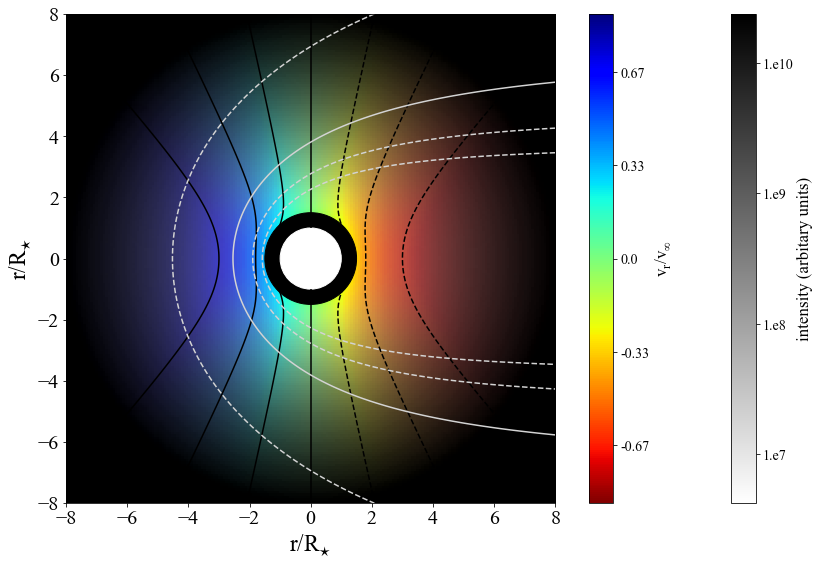

In [383]:
# setting up figure size and range

plt.figure(figsize = (15, 9))

plt.xlim(-maxratio, maxratio)
plt.ylim(-maxratio, maxratio)


# labeling axis and ticks

plt.xlabel(r'$r/R_{\star}$', fontsize = 23)
plt.ylabel(r'$r/R_{\star}$', fontsize = 23)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# drawing star and the stellar wind boundary

shock = plt.Circle((0, 0), R_shock/R_star, color='black')
plt.gca().add_patch(shock)

star = plt.Circle((0,0), 1, color = 'white')
plt.gca().add_patch(star)


# plotting redshift and contours

color = f(X, Y)

redshift_contour = plt.contour(X, Y, color, 7, colors = 'black')
redshift = plt.imshow(color, extent = [-maxratio, maxratio, -maxratio, maxratio], origin = 'lower', cmap = plt.cm.jet_r, alpha = 1)


# plotting log10(density^2)

alphas = Normalize(g(R_shock/R_star, 0), g(maxratio, 0), clip = True)(g(X, Y)) # setting up transparency as a function of -log10(density^2)
brightness = Normalize(g(R_shock/R_star, 0), g(maxratio, 0), clip = True)(g(X, Y))
brightness = plt.cm.gray_r(brightness)
brightness[..., -1] = alphas

intensity = plt.imshow(brightness, extent = [-maxratio, maxratio, -maxratio, maxratio], origin = 'lower', cmap = plt.cm.gray_r)
# plt.clabel(plt.contour(X, Y, g(X, Y)))


# plotting optical depth contours
depth = plt.contour(x, y, op, levels = [0.5, 1.5, 2], colors = 'lightgray', linestyles='dashed')
depth = plt.contour(x, y, op, levels = [1], colors = 'lightgray')

# drawing intensity color bar

intensity_ticks = np.linspace(5/50, 45/50, 4) # 5/50 and 45/50 are tested values where 7 and 10 are, if 6.65 = g(R_shock/R_star, 0) to 10.4 = g(maxratio, 0) are normalized from 0 to 1
corrected_intensity_ticks = '1.e7', '1.e8', '1.e9', '1.e10'
# corrected_intensity_ticks = np.format_float_scientific(np.power(10, g(R_shock/R_star, 0)), precision=1, exp_digits=2), np.format_float_scientific(np.power(10, g(R_shock/R_star, 0)*0.75+g(maxratio, 0)*0.25), precision=1, exp_digits=2), np.format_float_scientific(np.power(10, (g(R_shock/R_star, 0)+g(maxratio, 0))*0.5), precision=1, exp_digits=2), np.format_float_scientific(np.power(10, g(R_shock/R_star, 0)*0.25+g(maxratio, 0)*0.75), precision=1, exp_digits=2), np.format_float_scientific(np.power(10, g(maxratio, 0)), precision=1, exp_digits=2)

intensity_cb = plt.colorbar(intensity, ticks = intensity_ticks)
intensity_cb.ax.set_yticklabels(corrected_intensity_ticks, fontsize = 14)
intensity_cb.ax.set_ylabel(r'intensity (arbitary units)', fontsize = 17)


# drawing redshift color bar

redshift_shock = f(R_shock/R_star, 0)
redshift_ticks = 2*redshift_shock, redshift_shock, 0, -redshift_shock, -2*redshift_shock

redshift_cb = plt.colorbar(redshift, ticks = redshift_ticks)
redshift_cb.ax.set_yticklabels(np.round(np.multiply(redshift_ticks, R_star/V_inf), decimals = 2), fontsize = 14)
redshift_cb.ax.set_ylabel(r'$v_r/v_{\infty}$', fontsize = 17)



plt.savefig('wind_contour_plot.png')
plt.show()